<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/112%20-%20Lesson%20112%20(Hierarchical%20Clustering%20-%20Dendrogram).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 112: Hierarchical Clustering - Dendrogram

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Hierarchical Clustering - Dendrogram|
|||
|**Class Description**|In this class, a student will learn to cluster a two-dimensional dataset using agglomerative hierarchical clustering.|
|||
|**Class**|C112|
|||
|**Class Time**|45 minutes|
|||
|**Goal**|Understand the concept of hierarchical clustering.|
||Implementing dendrogram using Python.|
||Implementing hierarchical clustering using scikit-learn.|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

### Teacher-Student Activities

In the previous classes, we implemented one of the most basic clustering algorithms called K-Means clustering on customer segmentation problem statement.

In this lesson, we will use a different approach to clustering to solve a new problem statement. Let us look at the problem statement first.

An international charitable NGO  raised around $\$$10 million after a few funding programmes. The CEO of the NGO needs to decide which countries are in immediate need of this fund so that these funds are utilised optimally and effectively.

Our job is to cluster the countries using some socio-economic and health factors that determine the overall development of the country and provide suggestion of the countries to the CEO.

We will be using  a dataset of 167 countries consisting of following attributes:

|Attribute|Description|
|-|-|
|`country`|Name of the country.|
|`child_mort` | Death of children under 5 years of age per 1000 live births.|
|`exports`| Exports of goods and services per capita. Given as percentage of the GDP per capita.|
|`health`| Total health spending per capita. Given as percentage of GDP per capita.|
|`imports` | Imports of goods and services per capita. Given as percentage of the GDP per capita.|
|`income` | Net income per person.|
|`inflation` | The measurement of the annual growth rate of the Total GDP.|
|`life_expec` | The average number of years a new born child would live if the current mortality patterns are to remain the same.|
|`total_fer` |The number of children that would be born to each woman if the current age-fertility rates remain the same.|
|`gdpp` | The GDP per capita. Calculated as the Total GDP divided by the total population.|









**Link to the dataset:** https://raw.githubusercontent.com/whitehatjr-test/heightweight/master/Country-data.csv

**Dataset Credits:** https://www.kaggle.com/gauravduttakiit/help-international





In [ ]:
# Import the Python modules and the data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ngo_df = pd.read_csv("https://raw.githubusercontent.com/whitehatjr-test/heightweight/master/Country-data.csv")
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


We can see that, the countries are not categorised in any way. We need to create an unsupervised model to make sure that the NGO helps the right country who actually needs help. For this purpose, we will use another clustering algorithm called **Hierarchical Clustering**.


Let's first understand hierarchical clustering using a simple dataset. Thereafter, we will come back to solve the above problem statement.


---

#### Activity 1: Understanding Hierarchical Clustering

Hierarchical clustering, as the name suggests builds a hierarchy of clusters.

Like K-means, hierarchical clustering also groups data points having similar characteristics together. However, unlike K-Means, this algorithm does not require us to specify the number of clusters (`K`) beforehand. The algorithm on itself deduces the optimum number of cluster and displays it in the form of a tree like structure.

Let us understand this concept using a simple example.

Imagine that we were simply presented with two features
of animals:
- `height` (measured from the tip of the nose to the end of the tail).
- `weight`

|height|weight|
|-|-|
|22|40|
|25|43|
|17|37|
|35|60|
|37|53|
|41|62|

Since we are given only animal's  heights and weights, we won't be able to speculate the exact name of each species. However, by creating clusters of these animals on the basis of the features provided, we can derive different categories of animal species that exist in this dataset.

Let us create a two-dimensional numpy array containing the above heights and weights of animals.

In [ ]:
# S1.1: Create numpy array of animal heights and weights.
import numpy as np
animals_arr = np.array([[22, 40], [24, 43], [17, 37], [35, 60], [37, 53], [41, 62]])
animals_arr

array([[22, 40],
       [24, 43],
       [17, 37],
       [35, 60],
       [37, 53],
       [41, 62]])

Let's plot the above data points using scatter plot. Also annotate each data point with a number. For example, first data point must be labelled as `1`, second data point must be labelled as `2` and so on. For this purpose, use `annotate()` function of `matplotlib.pyplot` module.

You can use `help()` function to understand the syntax of `annotate()` function in detail.

In [ ]:
# Use help() function to learn more about 'annotate()' function.
help(plt.annotate)

Help on function annotate in module matplotlib.pyplot:

annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
    Annotate the point *xy* with text *text*.
    
    In the simplest form, the text is placed at *xy*.
    
    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.
    
    Parameters
    ----------
    text : str
        The text of the annotation.
    
    xy : (float, float)
        The point *(x, y)* to annotate. The coordinate system is determined
        by *xycoords*.
    
    xytext : (float, float), default: *xy*
        The position *(x, y)* to place the text at. The coordinate system
        is determined by *textcoords*.
    
    xycoords : single or two-tuple of str or `.Artist` or `.Transform` or callable, default: 'data'
    
        The coordinate system that *xy* is given i

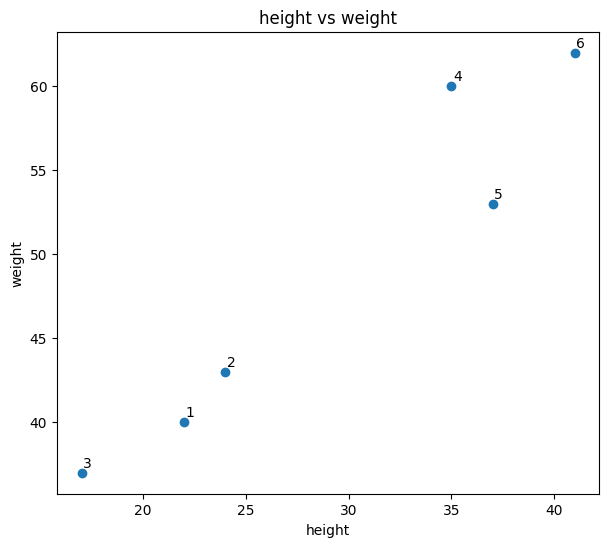

In [ ]:
# S1.2: Create a scatter plot showing animal height and weight with each animal numbered from 1 to 6.
import matplotlib.pyplot as plt

animal_lbl = range(1, 7)
plt.figure(figsize=(7, 6))
plt.title('height vs weight')
plt.xlabel('height')
plt.ylabel('weight')

plt.scatter(animals_arr[:,0], animals_arr[:,1])

for label, x, y in zip(animal_lbl, animals_arr[:, 0], animals_arr[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(1, 4), textcoords='offset points')
plt.show()

Thus, we have a sample of 6 data points having following $x$-coordinate and  $y$-coordinate values:

|Cluster|$x$-cord|$y$-cord|
|-|-|-|
|1|22|40|
|2|24|43|
|3|17|37|
|4|35|60|
|5|37|53|
|6|41|62|

One approach of hierarchical clustering is by starting with each data point in its own cluster and recursively joining the similar points together to form clusters. This approach is known as **agglomerative hierarchical clustering**.

**Agglomerative clustering:**
- This algorithm begins with each data point as a single cluster and then combines the closest pair of clusters together.
- It does this until all the clusters are merged into a single cluster that contains all the data points.

Let us learn how Agglomerative Hierarchical clustering work on the above dataset.

**Step 1:** The clustering begins with each data point in its own cluster. As there are 6 data points in the `animals_arr` dataset, so the number of clusters will be `6`.


<img src="https://s3-whjr-v2-prod-bucket.whjr.online/52fc46ca-d035-4f9d-8c45-9d7bf42eb398.png"/></center>

**Step 2:** Take two closest data points or clusters and merge them to form one cluster. For this, the euclidean distance between each  data point is calculated.

From the above scatter plot, it is clearly visible that data points $1$ and $2$ are closest to each other. Let us verify this by computing the euclidean distance between each of these data points using `distance_matrix()` function of `scipy.spatial` module. This function returns a proximity matrix which will tell us the distance between each of these points.

Use `help()` function to learn more about the `distance_matrix()` function.


In [ ]:
# Use 'help()' function to learn more about 'distance_matrix()' function.
from scipy.spatial import distance_matrix
help(distance_matrix)

Help on function distance_matrix in module scipy.spatial._kdtree:

distance_matrix(x, y, p=2, threshold=1000000)
    Compute the distance matrix.
    
    Returns the matrix of all pair-wise distances.
    
    Parameters
    ----------
    x : (M, K) array_like
        Matrix of M vectors in K dimensions.
    y : (N, K) array_like
        Matrix of N vectors in K dimensions.
    p : float, 1 <= p <= infinity
        Which Minkowski p-norm to use.
    threshold : positive int
        If ``M * N * K`` > `threshold`, algorithm uses a Python loop instead
        of large temporary arrays.
    
    Returns
    -------
    result : (M, N) ndarray
        Matrix containing the distance from every vector in `x` to every vector
        in `y`.
    
    Examples
    --------
    >>> from scipy.spatial import distance_matrix
    >>> distance_matrix([[0,0],[0,1]], [[1,0],[1,1]])
    array([[ 1.        ,  1.41421356],
           [ 1.41421356,  1.        ]])



In [ ]:
# S1.3: Use 'distance_matrix()' function to compute the euclidean distance between each of the data points.
from scipy.spatial import distance_matrix
pd.DataFrame(distance_matrix(animals_arr, animals_arr), index=animal_lbl, columns=animal_lbl)

,1,2,3,4,5,6
1,0.000000,3.605551,5.830952,23.853721,19.849433,29.068884
2,3.605551,0.000000,9.219544,20.248457,16.401219,25.495098
3,5.830952,9.219544,0.000000,29.206164,25.612497,34.655447
4,23.853721,20.248457,29.206164,0.000000,7.280110,6.324555
5,19.849433,16.401219,25.612497,7.280110,0.000000,9.848858
6,29.068884,25.495098,34.655447,6.324555,9.848858,0.000000


**Note:** The diagonal elements of this proximity matrix will always be 0 as the distance of a point with itself is always 0.


From the above distance matrix, we can observe that distance between data point $1$ (`[22, 40]`) and data point $2$ (`[24, 43]`) is the least. Hence, the data points $1$ and $2$ join into a single cluster. Now, there will be 5 clusters.


<img src="https://s3-whjr-v2-prod-bucket.whjr.online/0e58c966-13e3-47f0-894a-d8c0f3697491.png"/>

The updated clusters after merging data points $1$ and $2$ are:

|Cluster|$x$-cord|$y$-cord|
|-|-|-|
|1, 2|22|40|
|3|17|37|
|4|35|60|
|5|37|53|
|6|41|62|

Here, we have taken the minimum of the data point $1$ and data point $2$ i.e. `min([22, 40], [24, 43])` to replace the distance for the merged cluster $\{1, 2\}$. Instead of the minimum, we can also take the maximum value or the average values as well. These measures are called **Linkage methods**. We will learn them in more detail in the upcoming section.

Now, the proximity matrix for these new clusters is again calculated:

||1, 2|	3|	4|	5|	6|
|-|-|-|-|-|-|
|1, 2|	0.000000|	5.830952|	23.853721	|19.849433|	29.068884|
|3|	5.830952|	0.000000|	29.206164	|25.612497|	34.655447|
|4|	23.853721|	29.206164|	0.000000|	7.280110|	6.324555|
|5|	19.849433|	25.612497|	7.280110|	0.000000|	9.848858|
|6|	29.068884	|34.655447|	6.324555|	9.848858|	0.000000|

**Step 3:** Again, take the two closest clusters and merge them together to form one cluster.

From the above proximity matrix, we can observe that distance between data point $\{1, 2\}$ (`[22, 40]`) and data point $3$ (`[17, 37]`) is the least. Hence, the data points $\{1, 2\}$ and $3$ join into a single cluster. Now, there will be 4 clusters.


<img src="https://s3-whjr-v2-prod-bucket.whjr.online/3c175de3-24dd-4235-bfd5-a631a2b56352.png"/>

The updated clusters after merging data points $\{1, 2\}$ and $3$ are:

|Cluster|$x$-cord|$y$-cord|
|-|-|-|
|1, 2, 3|17|37|
|4|35|60|
|5|37|53|
|6|41|62|

Again, we have taken the minimum of the data point  $\{1, 2\}$ and data point $3$ i.e. `min([22, 40], [17, 37])` to replace the distance for the merged cluster $\{1, 2, 3\}$.

Now, the proximity matrix for these new clusters is again calculated:

||1, 2,3|	4|	5|	6|
|-|-|-|-|-|
|1, 2, 3|	0.000000|	29.206164	|25.612497|	34.655447|
|4|	29.206164	|0.000000	|7.280110	|6.324555|
|5|	25.612497|	7.280110|	0.000000|	9.848858|
|6|		34.655447	|6.324555|	9.848858|	0.000000|



**Step 4:** Repeat Step 3 until only one cluster left. So, we will get the following clusters.

<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/0548444c-c789-45f5-a07b-4d03640dc8a2.png"/>
<br/>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/55f4107d-08de-4e2d-8d51-b1e6616af5e2.png"/>
<br/>
<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/07ed6f82-b34d-4b6b-8a4d-26b676e240f1.png"/>


The sequences of these merges are recorded in a tree like structure called **dendrogram**. Dendrograms provides a great way to illustrate the arrangement of the clusters produced by hierarchical clustering. Thus, the dendrogram for the above dataset clustering will look like this:
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/37400f1e-b7c1-48e8-bc98-c6ebf51586d8.png"/>

In the above diagram, the left part shows the the corresponding dendrogram for the agglomerative clustering done with `animals_arr` dataset. In a dendrogram plot, the $y$-axis shows the Euclidean distances between the data points, and the $x$-axis shows all the data points of the given dataset.

- As we have discussed above, firstly, the data points $1$ and $2$ combine together and form a cluster, correspondingly a dendrogram is created, which connects $1$ and $2$  with a rectangular shape. The height is decided according to the Euclidean distance between the data points.
- Similarly, all the merging of clusters can be depicted in a dendrogram. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

Let us learn how to create this dendrogram using python.

---

#### Activity 2: Implementing Dendrogram using Python

Before implementing dendrogram,we will first understand different linkage methods, as this is an important parameter for dendrogram plotting.

**Linkage:**

In general, Linkage is distance between two clusters.

In the previous activity, we merged two clusters by considering the minimum distance between two clusters as the new distance of the merged cluster. This method is known as *Single Linkage*.

However, this is not the only option when it comes to clustering data points together. Other choices for determining distances between clusters are as follows:

**1. Single Linkage**
  - In single linkage, the distance between two clusters is the shortest distance between two points in the two clusters.

    For example, consider the following two clusters:

   <img src="https://s3-whjr-v2-prod-bucket.whjr.online/c764aba8-814a-4b2b-ba62-ba9d622c264f.png"/>

  - In the above example, the distance between green and red clusters would be the distance between data points $2$ and $5$ as per single linkage criteria.


**2. Complete Linkage**

  - It is the opposite of single linkage.
  - In complete linkage, the distance between two clusters is the farthest distance between two points in two clusters.

    For example,

   <img src="https://s3-whjr-v2-prod-bucket.whjr.online/19f57629-a87d-46c2-b283-58f89edcddca.png"/>

  - In the above example, the distance between green and red clusters would be the distance between data points $3$ and $6$ as per complete linkage criteria.


**3. Average Linkage**
  -  It is between single and complete linkage.   
  - In average linkage, the distance between two clusters is the average distance between every point of one cluster to every other point of the other cluster.

**4. Centroid Linkage**
  - In centroid linkage, the distance between two clusters is the distance between centroids of those clusters.

  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/949bfe9d-3eb7-41c5-8163-3dc4b6496121.png"/>

**5. Ward Linkage**
 - This approach  is same as Average Linkage except that Ward's method calculates the sum of the square of the distances between every point of one cluster to every other point of the other cluster.

From the above given linkage methods, we can apply any of them according to the type of problem or business requirement.

Let us now plot dendrogram for `animals_arr` dataset.

**Plotting Dendrogram:**

The `scipy.cluster` module equips us with tools that are needed for hierarchical clustering and dendrogram plotting.

The dendrogram can be plotted easily using the linkage matrix. A linkage matrix is created via `linkage()` function. This matrix contains the distance between clusters based on the specified linkage method. Following is the syntax of `linkage()` function:

`hierarchy.linkage(data, method= 'single')`

Here,
 - `data:` The dataset (input 1D/2D array).
 - `method`: Linkage methods. Default value is `'single'`. Other values are `'complete'`, `'average'`, `'centroid'`, `'ward'`.

Follow the steps given below to plot the dendrogram:

1. Import `linkage` and `dendrogram` functions from `scipy.cluster.hierarchy` module.
2. Call `linkage()` function and pass `animals_arr` dataset and `method = single` as inputs. Store the returned linkage matrix in a variable `s_distances`.
3.  Plot the dendrogram by calling the `dendrogram()` function and pass the linkage matrix `s_distances` as input to this function. Also , pass `labels = animal_lbl` as input to `dendrogram()` function to label the data points on $x$-axis.

4. Also, set the `xlabel` and `ylabel` of this dendrogram using `matplotlib.pyplot` module.

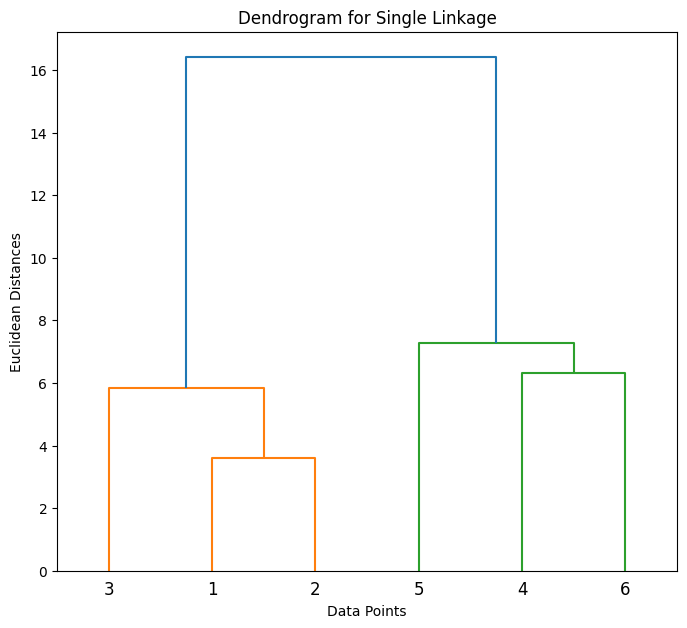

In [ ]:
# S2.1: Plot dendrogram for single linkage.
from scipy.cluster.hierarchy import linkage, dendrogram
s_distances = linkage(animals_arr, method="single")

plt.figure(figsize=(8, 7))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.title("Dendrogram for Single Linkage")
dendrogram(s_distances, labels = animal_lbl)
plt.show()

The dendrogram obtained in the above plot is for single linkage. Let us plot the dendrogram for complete linkage by passing `method = complete` as input to the `linkage()` function.

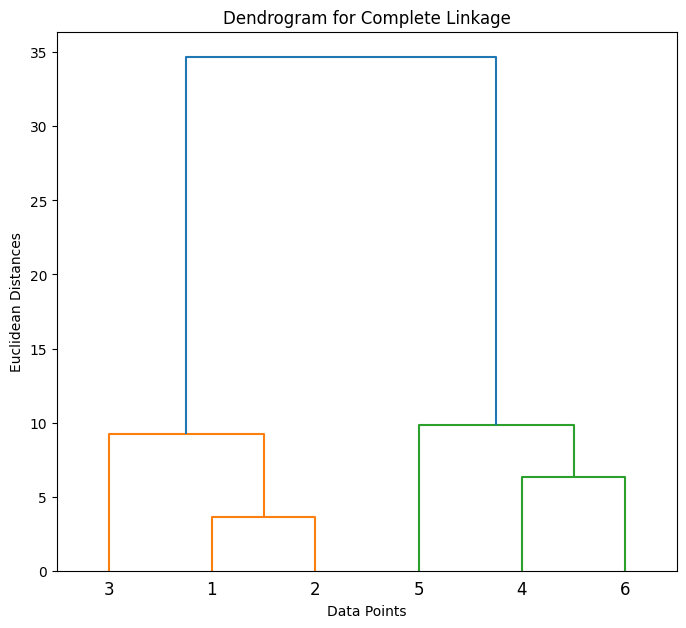

In [ ]:
# S2.2: Plot dendrogram for complete linkage.
c_distances = linkage(animals_arr, method="complete")

plt.figure(figsize=(8, 7))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.title("Dendrogram for Complete Linkage")
dendrogram(c_distances, labels = animal_lbl)
plt.show()

From the above plot, we can say that same clusters are obtained for both single and complete linkage, except that $y$-axis shows different euclidean distances.

However, this may not be the case with other problem statements. Different linkage method results in different hierarchical clustering and a different dendrogram.

Using this Dendrogram, we will now determine the optimal number of clusters for our model.

---

#### Determining Number of Clusters

A major advantage of hierarchical clustering over K-Means is that when we generate the cluster hierarchy, we have generated a full tree all the way from every data point in its own cluster up to a single cluster.

To determine the optimal number of clusters for our model,
- Select the longest vertical distance without any horizontal line passing through it and draw a  new horizontal line through it.
- The number of vertical lines this newly created horizontal line passes is equal to the number of clusters.

Consider the dendrogram that we had obtained for single linkage.

<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/e2cd8fba-1d31-49b8-b65f-2dd9470a3200.png"/></center>

We can see that the largest vertical distance without any horizontal line passing through it is represented by <b><font color=blue>blue</font></b> line. So we draw a new horizontal black line that passes through this blue vertical line. Since it crosses the blue line at three points, therefore the optimal number of clusters for this model will be **3**.

Basically the horizontal black line is a **threshold**, which defines the minimum distance required to be a separate cluster. If we draw the line a little up, the threshold required to be a new cluster will be increased and less clusters will be formed as seen in the image below:

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/02b74133-13ad-4165-bcb0-65f24b723401.png"/></center>

In the above image, the horizontal line passes through two vertical lines resulting in two clusters:
 - First cluster of points 3, 1 and 2.
 - Second cluster of points 5, 4 and 6.


Thus, dendrogram brings a really nice feature: we can read off as many clusters as we want.  We need not decide how many clusters we want at the beginning.

Let's now apply agglomerative hierarchical clustering for 2 clusters. You can also apply clustering for 3 clusters.

---

#### Activity 3: Hierarchical Clustering using Scikit-Learn

As we know the required optimal number of clusters, we can now train our model. For this, import `AgglomerativeClustering` class of `sklearn.cluster` module and pass the following inputs to the constructor of `AgglomerativeClustering` class:

- `n_clusters = 2`: It defines the number of clusters. As our dataset is small, we have taken `2` clusters. You may also consider `3` clusters.

- `linkage = 'single'`: It defines the linkage criteria, here we have used the `'single'` linkage.

Also, call the `fit_predict()` function using the object of `AgglomerativeClustering` class to train the model and predict the cluster labels as done for K-Means.

**Note:** The `AgglomerativeClustering` class does not have a `predict()` function.

In [ ]:
# S3.1: Determine the clusters using agglomerative clustering.
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, linkage = 'single')
cluster_labels = hc.fit_predict(animals_arr)
print(cluster_labels)

[1 1 1 0 0 0]


In the above output, `0` represents the points that belong to the first cluster and `1` represents points in the second cluster.

As the cluster of each data point is now obtained, let's display those clusters using `plt.scatter()` function using the values of `cluster_labels` to colour-code the clusters.

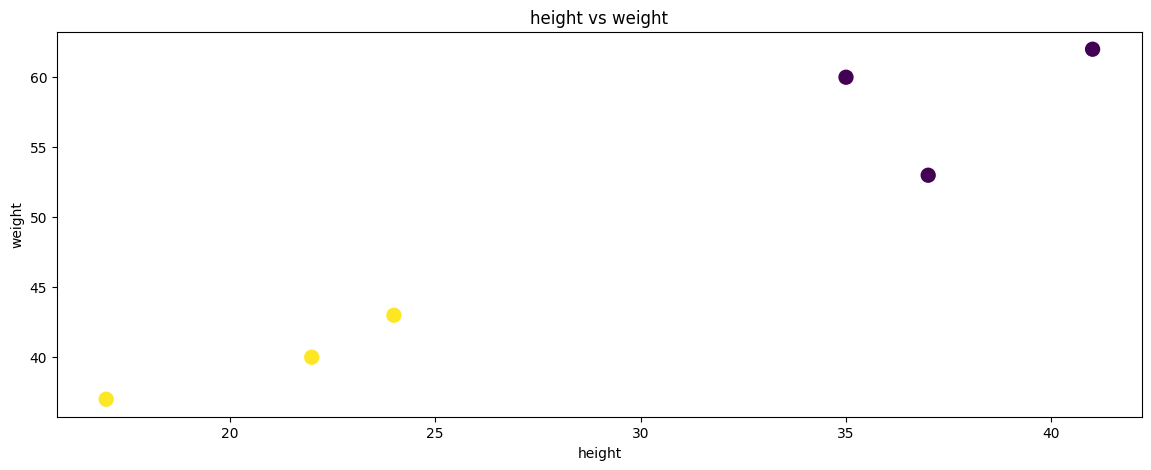

In [ ]:
# S3.2: Plot the datapoints corresponding to clusters
plt.figure(figsize = (14, 5))
plt.scatter(animals_arr[:,0], animals_arr[:,1], c = cluster_labels, s = 100)
plt.title('height vs weight')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

We can clearly visualise the two clusters here. This is how we can implement agglomerative hierarchical clustering in Python.

There is one more approach of hierarchical clustering known as **Divisive hierarchical clustering**.

**Divisive clustering:**

- This algorithm works in the opposite way of agglomerative clustering.
- In this, we start with all the data points as a single cluster.
- At each iteration, we separate the farthest points or clusters which are not similar until each data point is considered as an individual cluster.
- Here we are dividing the single clusters into n clusters, therefore the name divisive clustering.

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/0dbb3c8c-960a-46dd-a5db-88e384e43523.png"/>

Thus, agglomerative is **bottom-up** approach whereas divisive is **top-down** approach.

Divisive hierarchical clustering is not used much in solving real-world problems. Hence, we won't explore it in much detail.

We will stop here. In the next class, we will implement hierarchical clustering on NGO dataset.

---